<a href="https://colab.research.google.com/github/Ibilis37/DSP_/blob/main/%D0%9C%D0%9E%D0%A6%D0%9E%D0%A1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import scipy.stats as sts
import scipy as sc

## Лабораторная работа №1
### Вариант 1 (8%4+1)
#### 1. Синтезировать конечный сигнал x(t), представляющий из себя сумму двух синусоид с разными частотами

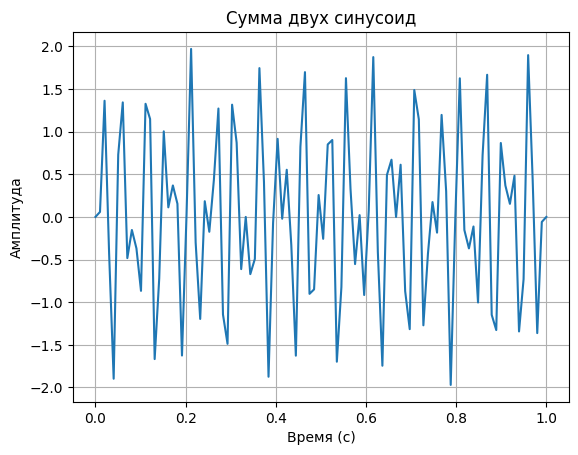

In [23]:
# Определение параметров сигнала
fs = 100  # частота дискретизации
t = np.linspace(0, 1, fs)  # временной вектор от 0 до 1 с шагом 1/fs
v1 = 20  # частота первой синусоиды
v2 = 67  # частота второй синусоиды

# Синтез сигнала как суммы двух синусоид
x = np.sin(2 * np.pi * v1 * t) + np.sin(2 * np.pi * v2 * t)

# Визуализация сигнала
plt.plot(t, x)
plt.title('Сумма двух синусоид')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

#### 2. Определить допустимые значения частоты дискретизации $f_s$ для сигнала $x(t)$

По теореме Котельникова частота дискретизации должна удовлетворять условию: $f_s > 2F_{max}$

 Тогда:


In [24]:
F_m = 2 * max(v1,v2) # F_m = 2*F_max
print(F_m)

134


условные обозначения: **$F_m = 2*F_{max}$**

#### 3. Построить по отсчетам графики дискретного сигнала и его спектра при нескольких различных частотах дискретизации (больше и меньше граничной частоты дискретизации). Сделать вывод.


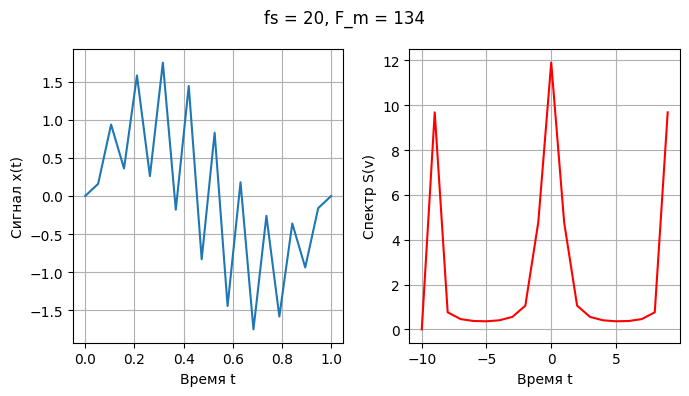

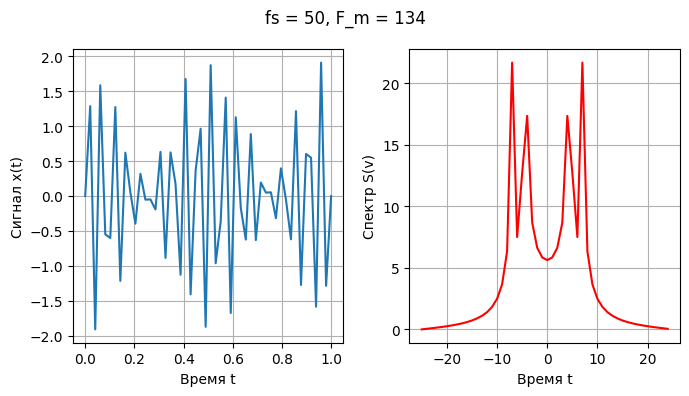

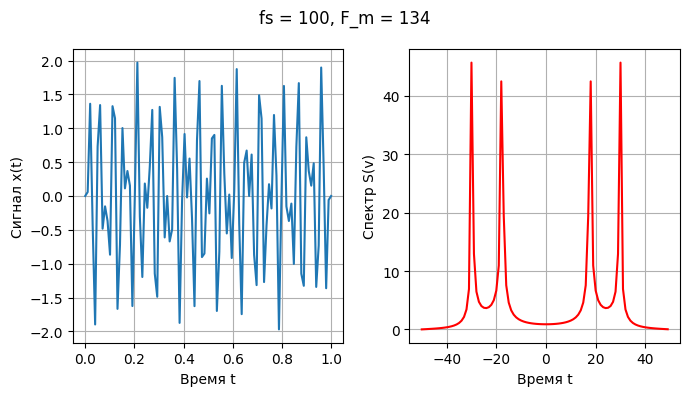

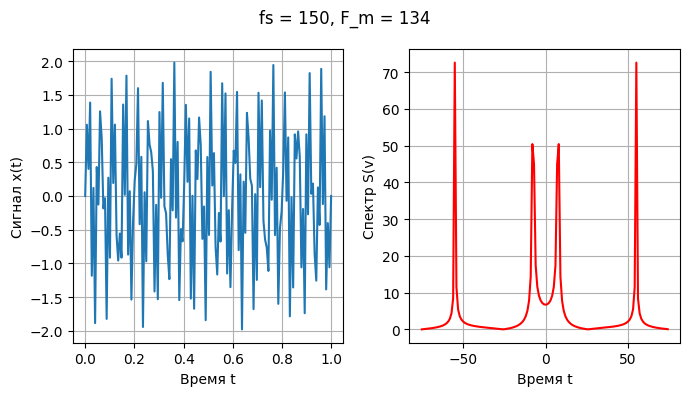

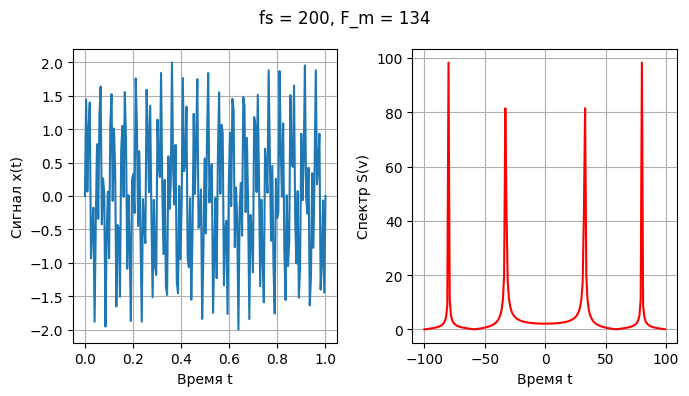

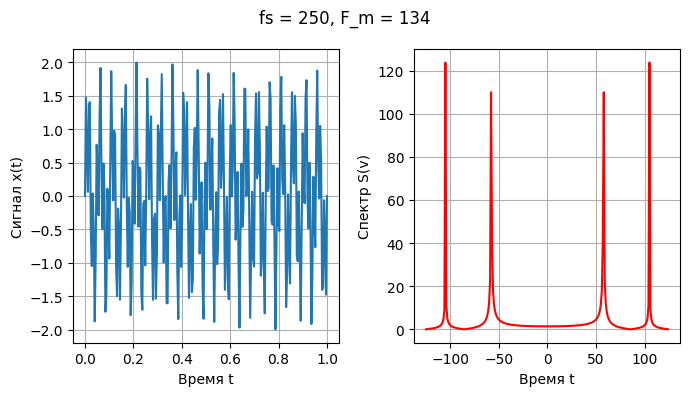

In [25]:
def generate_signal(fs):
  t = np.linspace(0, 1, fs)
  x = np.sin(2 * np.pi * v1 * t) + np.sin(2 * np.pi * v2 * t)
  return t,x
def my_FFT(x, fs):
    N = len(x) # кол-во отсчетов в сигнале
    freqs = np.fft.fftfreq(N, d=1/fs) # вычисление частот для каждого отсчета в БПФ
    freqs.sort()
    S = np.fft.fft(x) # спектр сигнала
    return freqs, S

def plot_signal(fs):
  plt.figure(figsize=(7, 4))
  plt.suptitle(f'fs = {fs}, F_m = {F_m}')
  plt.subplot(1,2,1)
  t, x = generate_signal(fs)
  plt.plot(t, x)
  plt.xlabel('Время t')
  plt.ylabel('Сигнал x(t)')
  plt.grid(True)
  plt.subplot(1,2,2)
  freqs, S = my_FFT(x,fs)
  plt.plot(freqs, abs(S), color = 'r')
  plt.xlabel('Время t')
  plt.ylabel('Спектр S(v)')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

fs_values = [20,50,100,150,200,250]
for fs in fs_values:
  plot_signal(fs)

По графикам видно, что при нарушении условия выбора шага дискретизации ($f_s > 2F_{max}$), период ф-ии спектра оказывается меньше ширины полосы [-F,F] исходного сигнала, и копии спектра перекрываются (в следствии чего возникают необратимые искажения сигнала из-за наложения частот).

#### 4. Проиллюстрировать на примере сигнала x(t) эффект наложения частот. Для этого необходимо привести сигнал x`(t), который при некоторой частоте дискретизации будет совпадать с сигналом x(t). (Такого эффекта можно добиться, если провести дискретизацию сигнала x(t) с неверной частотой дискретизации и затем восстановить его.)

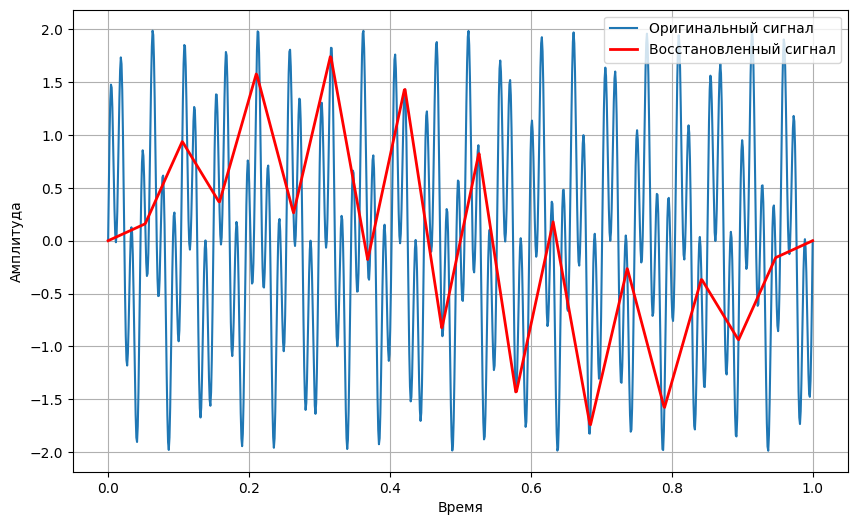

In [26]:
x = lambda t: np.sin(2 * np.pi * v1 * t) + np.sin(2 * np.pi * v2 * t)
fs_wrong = 20
fs = 1000
# Создание временной оси
t = np.linspace(0, 1, 1000)

# Дискретизация сигнала с неправильной частотой дискретизации
t_wrong = np.linspace(0, 1, int(len(t)/fs * fs_wrong))

# Восстановление сигнала с правильной частотой дискретизации
x_restored = np.interp(t, t_wrong, x(t_wrong)) # ф-ия интерполяции

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(t, x(t), label='Оригинальный сигнал')
plt.plot(t, x_restored, label='Восстановленный сигнал', color = 'r', linewidth = 2)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()

Действительно, на данном примере можно увидеть эффект наложения частот. Оригинальная и восстановленная функции совпадают в некоторых точках, но имеют разную природу.

#### 5. Загрузить тестовое изображение. Уменьшить частоту дискретизации в 2, 3, 4 раза с помощью прореживания матрицы исходного изображения. Сравнить полученные результаты с результатом использования скрипта, приведенного далее. Дополнительно можете сравнить полученные изображения с результатами, выдаваемыми функцией imresize.

Вместо метода imersize(), воспользуемся похожей ф-ей в Python - resize(), которая также применяет интерполяцию для получения нового изображения.
> Данная функция первым аргументом принимает изображение, размер которого мы хотим изменить, вторым — кортеж, который должен содержать в себе ширину и высоту для нового изображения. Функция использует билинейную интерполяцию.

Вместо скрипта использую функцию ndimage.zoom(). Принцип работы этого метода схож с методом resize(), однако здесь можно явно выбрать способ интерполяции (также существуют разлияные режими обработки границ изображения). Воспользуемся интерполяцией кубическими сплайнами ('order = 3')

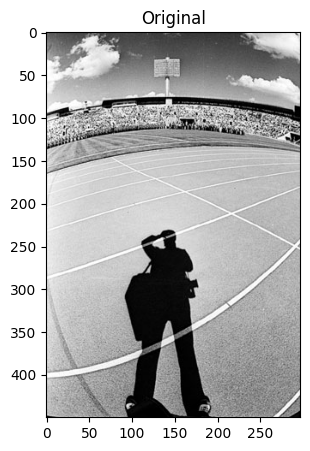

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io, transform

# Загрузка тестового изображения
image = io.imread('var1.png')
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title('Original')
plt.show()

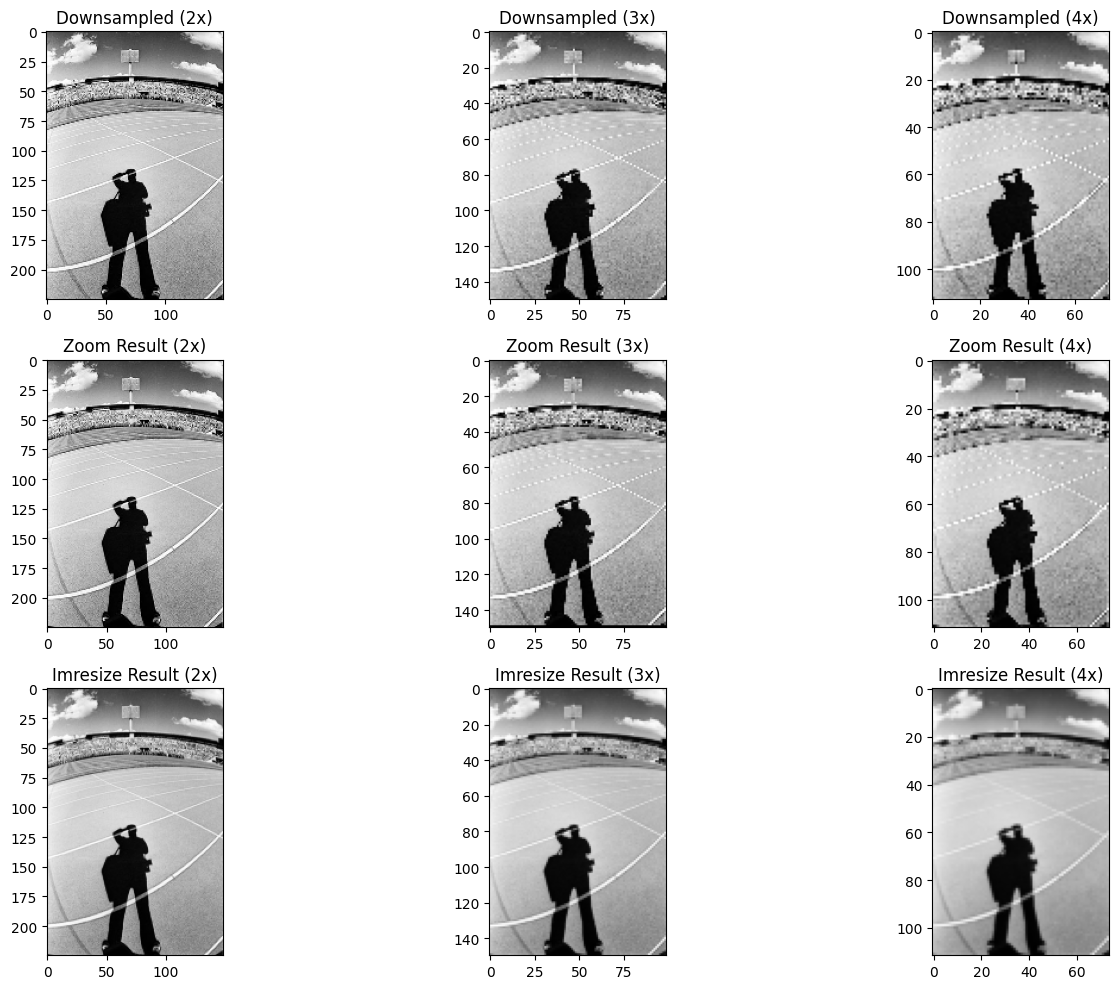

In [28]:
# Уменьшение частоты дискретизации в 2, 3 и 4 раза с помощью прореживания матрицы
downsampled_2 = image[::2, ::2]  # Уменьшение в 2 раза
downsampled_3 = image[::3, ::3]  # Уменьшение в 3 раза
downsampled_4 = image[::4, ::4]  # Уменьшение в 4 раза

# Результаты с использованием скрипта
script_result_2 = ndimage.zoom(image, (0.5, 0.5, 1), order = 3)
script_result_3 = ndimage.zoom(image, (1/3, 1/3, 1), order = 3)
script_result_4 = ndimage.zoom(image, (0.25, 0.25, 1), order = 3)

# Результаты функции imresize
imresize_result_2 = transform.resize(image, (image.shape[0] // 2, image.shape[1] // 2))
imresize_result_3 = transform.resize(image, (image.shape[0] // 3, image.shape[1] // 3))
imresize_result_4 = transform.resize(image, (image.shape[0] // 4, image.shape[1] // 4))

# Вывод изображений для сравнения

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
plt.imshow(downsampled_2)
plt.title('Downsampled (2x)')
plt.subplot(3, 3, 2)
plt.imshow(downsampled_3)
plt.title('Downsampled (3x)')
plt.subplot(3, 3, 3)
plt.imshow(downsampled_4)
plt.title('Downsampled (4x)')

plt.subplot(3, 3, 4)
plt.imshow(script_result_2)
plt.title('Zoom Result (2x)')
plt.subplot(3, 3, 5)
plt.imshow(script_result_3)
plt.title('Zoom Result (3x)')
plt.subplot(3, 3, 6)
plt.imshow(script_result_4)
plt.title('Zoom Result (4x)')

plt.subplot(3, 3, 7)
plt.imshow(imresize_result_2)
plt.title('Imresize Result (2x)')
plt.subplot(3, 3, 8)
plt.imshow(imresize_result_3)
plt.title('Imresize Result (3x)')
plt.subplot(3, 3, 9)
plt.imshow(imresize_result_4)
plt.title('Imresize Result (4x)')

plt.tight_layout()
plt.show()


### 2 Часть
####Синтезировать случайный дискретный сигнал x(k), состоящий из нескольких сотен отсчётов с одинаковым равномерным распределением.Построить по отсчетам его график.

In [29]:
from scipy.stats import uniform, norm
from scipy.integrate import quad

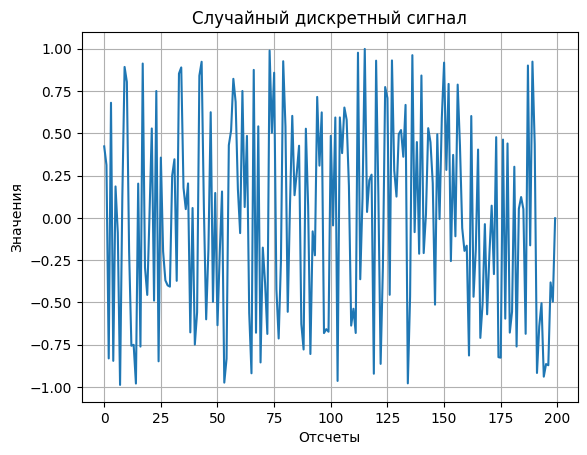

In [30]:
# Задаем количество отсчетов в сигнале
N = 200
# Задаем раавномерно распределенную СВ
x = uniform(-1, 2).rvs(N)

plt.plot(x)
plt.title('Случайный дискретный сигнал')
plt.xlabel('Отсчеты')
plt.ylabel('Значения')
plt.grid(True)

####2. Провести равномерное квантование с округлением отсчетов сигнала x(k), используя от 1 до 8 бит на отсчет. Построить ступенчатые графики сигнала после квантованияс помощью функции stairs.

In [31]:
def quantization(x, x_min=-1, x_max=1, quant_level=8):
    N = 2**quant_level
    q = (x_max - x_min) / N
    Q = np.zeros(len(x))
    arr = np.linspace(x_min, x_max, N+1)
    for i in range(len(x)):
      for j in range(N):
        if arr[j] < x[i] < arr[j+1]:
          Q[i] = x_min + (j+0.5)*q
    return Q

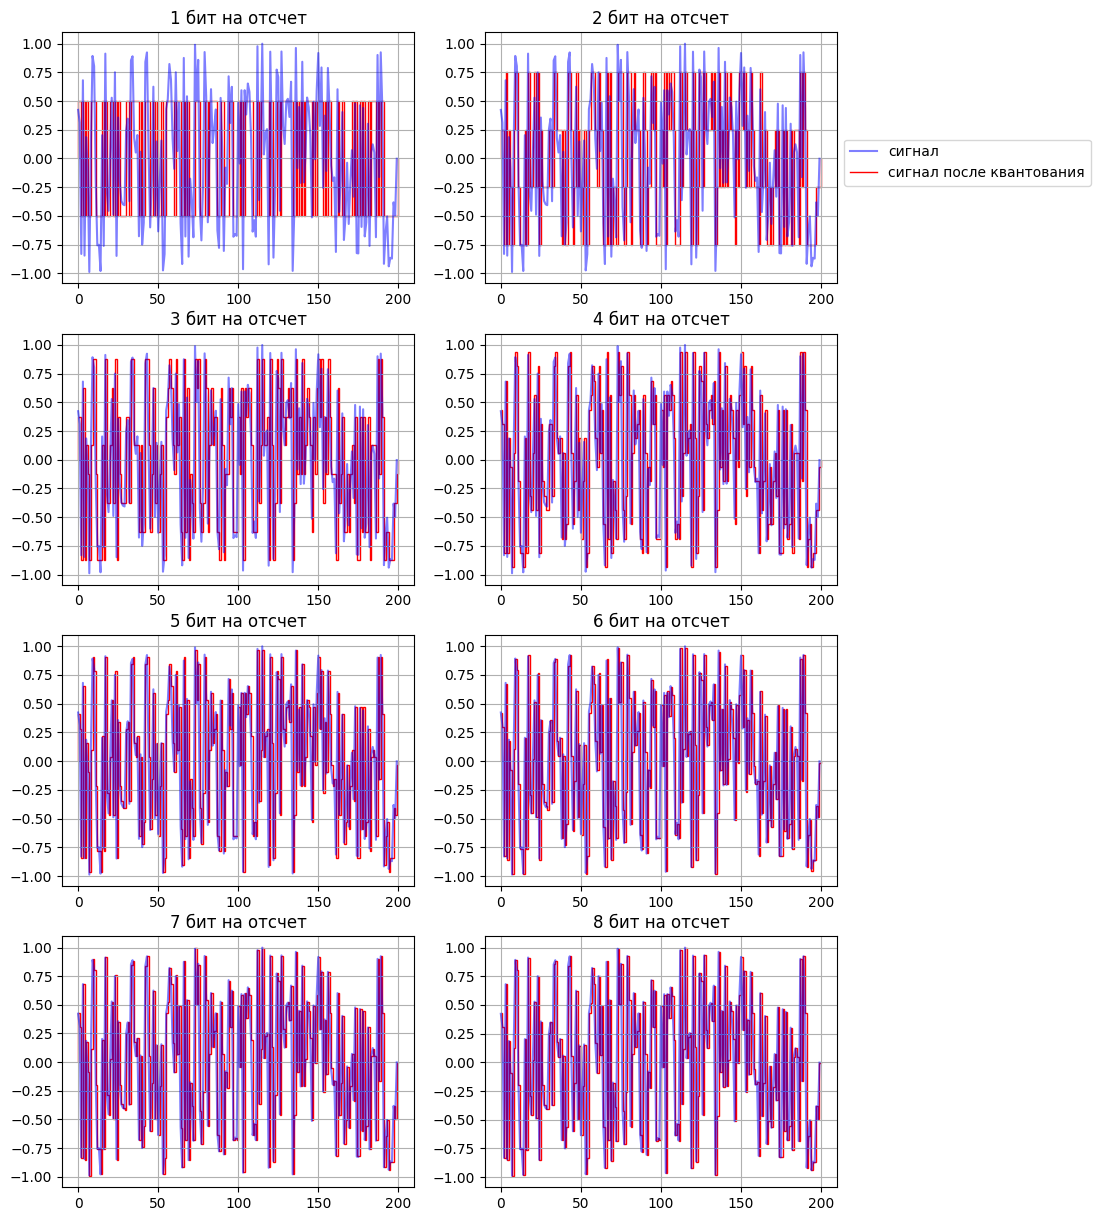

In [32]:
plt.figure(figsize=(10, 15))
for i in range(1,9):
    Q = quantization(x,quant_level=i)
    plt.subplot(4,2,i)
    plt.plot(x, alpha = 0.5, color = 'b')
    plt.stairs(Q, color = 'r')
    plt.title(f"{i} бит на отсчет")
    plt.grid(True)
plt.subplot(4,2,2)
plt.legend(('сигнал','сигнал после квантования'), bbox_to_anchor=(1, 0.6))

###3. Экспериментально оценить ошибку квантования. Сравнить полученные результаты с теоретической оценкой $\overline {ɛ^2} = D(ɛ)= \frac {q^2}{12}$ , где q – шаг равномерного квантования. Построить график зависимости ошибки квантования от количества битов, выделяемых на кодирование одногоотсчета.

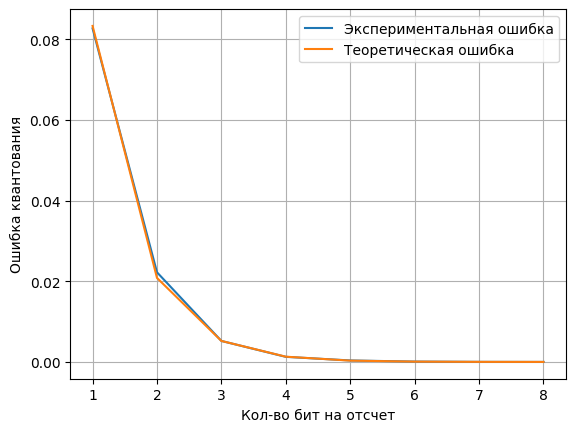

In [33]:
exper_err = []
teor_err = []
arg = []
for i in range(1,9):
    q = 2 / 2**i
    Q = quantization(x,quant_level=i)
    Q_err = []
    for j in range(len(x)):
      Q_err.append(abs(x[j]-Q[j])**2)
    exper_err.append(np.mean(Q_err))
    teor_err.append(q**2/12)
    arg.append(i)
plt.plot(arg, exper_err, label = 'Экспериментальная ошибка')
plt.plot(arg,teor_err, label = 'Теоретическая ошибка')
plt.xlabel('Кол-во бит на отсчет')
plt.ylabel('Ошибка квантования')
plt.legend()
plt.grid(True)

###4. Вычислить значение SNR. Исследовать зависимость SNR от числа битов, выделяемых на одинот счет сигнала

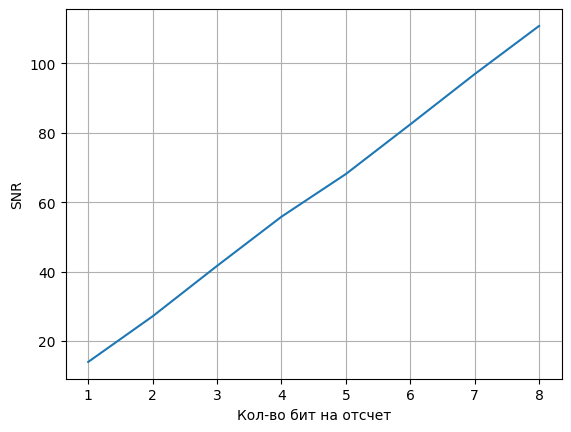

In [34]:
arg = []
SNR = []
for i in range(1,9):
    N = 2**i
    Q = quantization(x,quant_level=i)
    sum_n = 0
    sum_s = 0
    for j in range(len(x)):
      sum_n += (x[j]-Q[j])**2/N
      sum_s += (x[j]**2)/N
    SNR.append(20*np.log(np.sqrt(sum_s)/np.sqrt(sum_n)))
    arg.append(i)
plt.plot(arg, SNR)
plt.xlabel('Кол-во бит на отсчет')
plt.ylabel('SNR')
plt.grid(True)

График зависимости SNR(отношения сигнал-шум) от количества битов, выделяемых на осчет сигнала похож на линейную функцию. График монотонно возрастает => при увеличении кол-ва бит на отсчет,значение SNR будет также увеличиваться

###5. Используя функцию randn, синтезировать случайный дискретный сигнал $x(k)$ с нормальным распределением, где $m = 1$ и $\sigma = 2$. Построить по отсчетам его график.

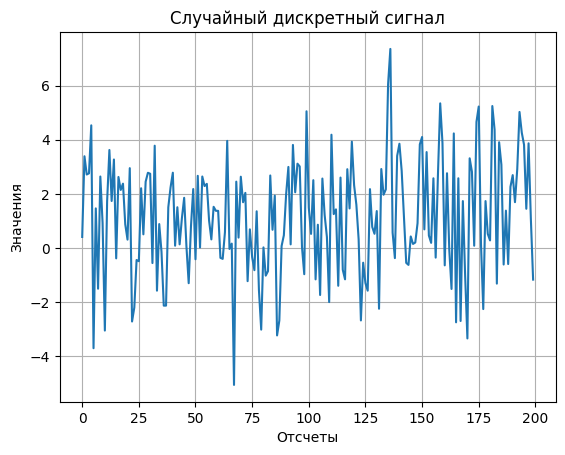

In [35]:
m, sig = 1, 2
# Задаем количество отсчетов в сигнале
N = 200
# Задаем нормально распределенную СВ
x = np.random.normal(m,sig,N)

plt.plot(x)
plt.title('Случайный дискретный сигнал')
plt.xlabel('Отсчеты')
plt.ylabel('Значения')
plt.grid(True)

###6.Определить параметры квантователя Ллойда-Макса: $$t^{'}_k = t_k \sigma +m,\,\, d^{'}_k =d_k \sigma +m,$$ где $\{t_k\}$ и $\{d_k\}$ – параметры оптимального квантования для стандартного нормального распределения с параметрами $m=0$, $\sigma=1$ (см. приложение).

In [36]:
d = [[-0.7979, 0.7979],
    [-1.5104, -0.4528, 0.4528, 1.5104],
    [-2.1519, -1.3439, -0.7560,-0.2451, 0.2451, 0.7560,1.3439, 2.1519],
    [-2.7326, -2.069,-1.618,-1.2562,-0.9423,-0.6568,-0.388,-0.1284, 0.1284,0.388,0.6568,0.9423,1.2562,1.618,2.069,2.7326]]
t = [[-np.inf,0,np.inf],
    [-np.inf,-0.9816, 0, 0.9816, np.inf],
    [-np.inf,-1.7479, -1.0500, -0.5005,0, 0.5005,1.0500,1.7479, np.inf],
    [-np.inf,-2.4008,-1.8435,-1.4371,-1.0993,-0.7995,-0.5224,-0.2582, 0, 0.2582,0.5224,0.7995,1.0993,1.4371,1.8435,2.4008,np.inf]]
d = [[j*sig+m for j in i] for i in d]
t = [[j*sig+m for j in i] for i in t]

###7. Выполнить оптимальное квантование сигнала $x(k)$, используя от 1 до 4 битов на отсчет.

In [37]:
def opt_quantization(x,t,d,x_min, x_max, quant_level=4):
    t = t[quant_level - 1]
    d = d[quant_level - 1]
    Q = np.zeros(len(x))
    for i in range(len(x)):
      for j in range(len(t)-1):
        if t[j] < x[i] < t[j+1]:
          Q[i] = d[j]
    return Q

-5.062106373886415 7.357827288524351


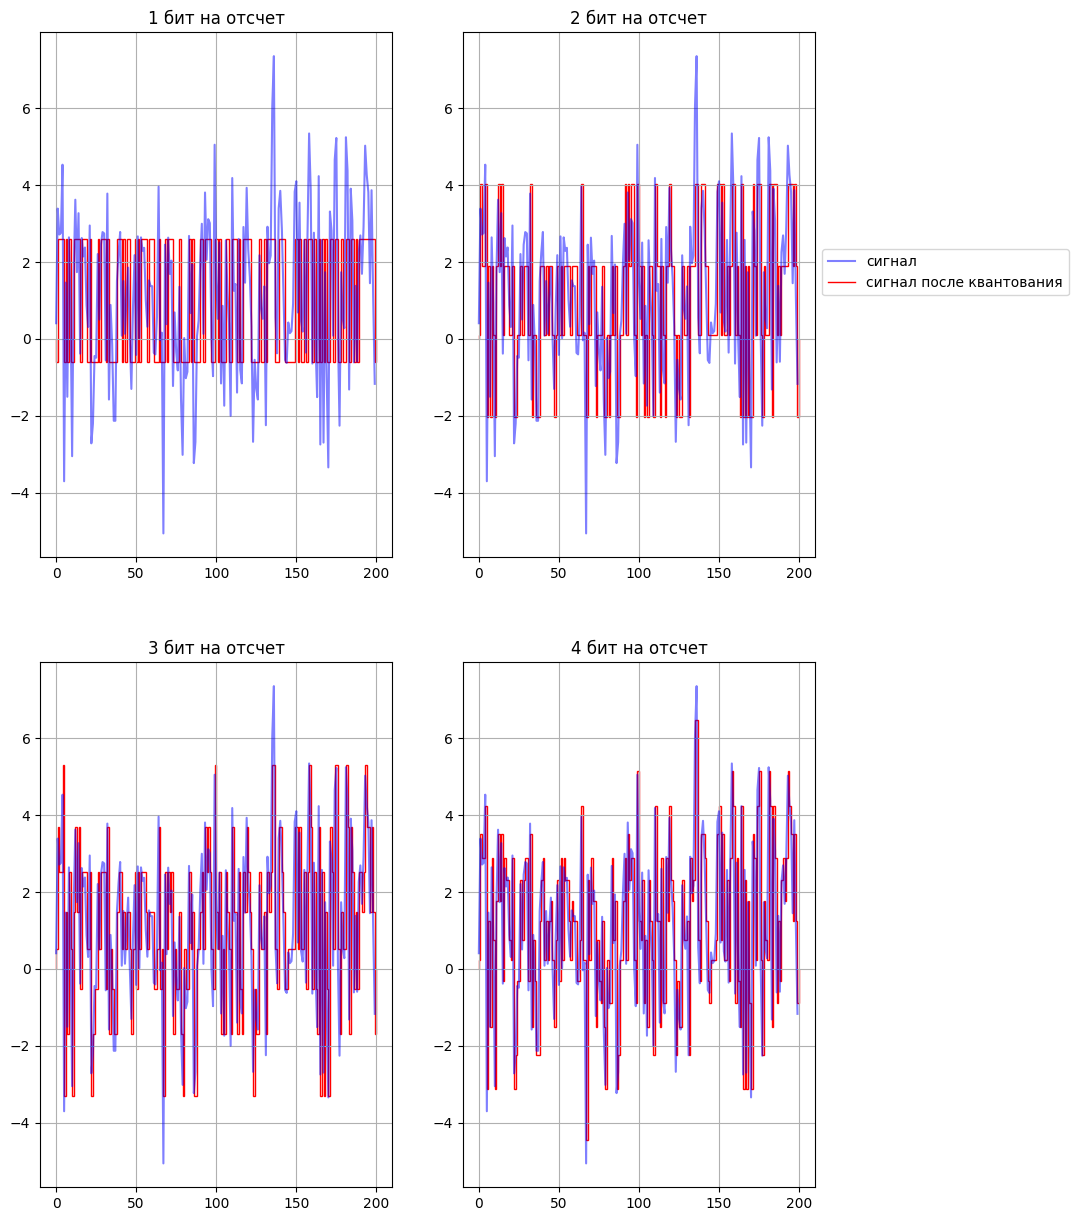

In [38]:
plt.figure(figsize=(10, 15))
print(min(x), max(x))
for i in range(1,5):
    Q = opt_quantization(x,t,d, min(x), max(x), quant_level=i)
    plt.subplot(2,2,i)
    plt.plot(x, alpha = 0.5, color = 'b')
    plt.stairs(Q, color = 'r')
    plt.title(f"{i} бит на отсчет")
    plt.grid(True)
plt.subplot(2,2,2)
plt.legend(('сигнал','сигнал после квантования'), bbox_to_anchor=(1, 0.6))

###8. Вычислить выборочные значения ошибки (2), (6) и SNR.


In [39]:
opt_exper_err = []
teor_err = []
arg = []
for i in range(1,5):
    q = 2 / 2**i
    Q = opt_quantization(x,t,d,min(x), max(x),quant_level=i)
    Q_err = []
    for j in range(len(x)):
      Q_err.append(abs(x[j]-Q[j])**2)
    opt_exper_err.append(np.mean(Q_err))
    teor_err.append(q**2/12)
    arg.append(i)
print('Значения ошибки по формуле 2: \n',opt_exper_err)

Значения ошибки по формуле 2: 
 [1.496401140062383, 0.4967147467115809, 0.13861755525718522, 0.04197430493217867]


In [40]:
err2 = []
for i in range(1,5):
    err = 0
    for j in range(len(t[i-1])-1):
        fun = lambda x:(x-d[i-1][j])**2*sts.norm(m,sig).pdf(x)
        err += ((sc.integrate.quad(fun,t[i-1][j],t[i-1][j+1])[0]))
    err2.append(err)
print('Значения ошибки по формуле 6: \n',err2)

Значения ошибки по формуле 6: 
 [1.4535209114831502, 0.469927392793302, 0.138191049806903, 0.038004038373821894]


In [41]:
SNR = []
for i in range(1,5):
    N = 2**i
    Q = opt_quantization(x,t,d,min(x),max(x),quant_level=i)
    sum_n = 0
    sum_s = 0
    for j in range(len(x)):
      sum_n += (x[j]-Q[j])**2/N
      sum_s += (x[j]**2)/N
    SNR.append(20*np.log(np.sqrt(sum_s)/np.sqrt(sum_n)))
print('Значение SRN^ \n',SNR)

Значение SRN^ 
 [13.340204270144882, 24.36822780312658, 37.13119951316076, 49.07781047622207]


###. Выполнить равномерное квантование сигнала x(k) при числе битов на отсчет от 1 до 4. Сравнить ошибки квантованияс полученными в предыдущем пункте.

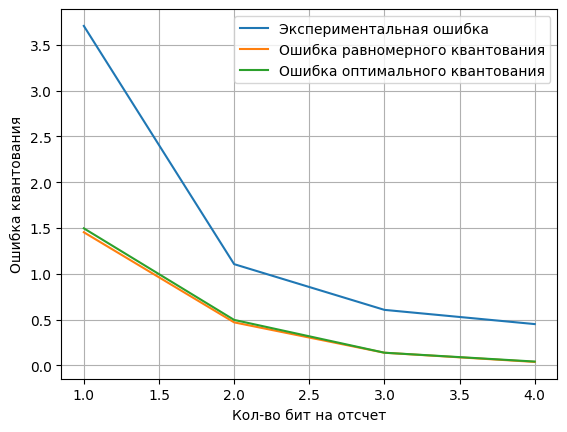

In [42]:
exper_err = []
for i in range(1,5):
    Q = quantization(x, min(x), max(x),quant_level=i)
    Q_err = []
    for j in range(len(x)):
      Q_err.append((x[j]-Q[j])**2)
    exper_err.append(np.mean(Q_err))
plt.plot(arg, exper_err, label = 'Экспериментальная ошибка')
plt.plot(arg,err2, label = 'Ошибка равномерного квантования')
plt.plot(arg,opt_exper_err, label = 'Ошибка оптимального квантования')
plt.xlabel('Кол-во бит на отсчет')
plt.ylabel('Ошибка квантования')
plt.legend()
plt.grid(True)